In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/diabetic_data_dummy.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'gender', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       ...
       'diag_2_neoplasms', 'diag_2_respiratory', 'diag_3_circulatory',
       'diag_3_diabetes', 'diag_3_digestive', 'diag_3_genitourinary',
       'diag_3_injury', 'diag_3_musculoskeletal', 'diag_3_neoplasms',
       'diag_3_respiratory'],
      dtype='object', length=146)

In [4]:
features = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = df.loc[:, features].values
x_scaled = ss.fit_transform(x)

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)

In [9]:
principalComponents

array([[-3.2113268 , -0.73436198, -0.5555918 , ..., -0.09758612,
        -0.02284042, -0.20941083],
       [ 0.13777804, -0.17806093, -0.90651692, ...,  0.59765654,
        -0.38054532,  0.64438776],
       [-0.67694879, -0.07777486,  2.89347816, ..., -0.63544115,
        -0.58899024, -0.68537525],
       ...,
       [-0.17241222,  0.66947406, -0.46011947, ...,  1.06336304,
        -1.10150148, -0.14662954],
       [ 1.79092735, -0.1871065 , -0.28780966, ..., -0.52910833,
         0.82172718, -0.64765488],
       [-0.67146625, -0.51960805,  0.92298536, ..., -0.03963579,
         0.45320599, -1.8736315 ]])

In [10]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5','principal component 6',
                                                                  'pricipal component 7', 'principal component 8'])

In [24]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [15]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_

In [16]:
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1

time_in_hospital      0.741971
num_lab_procedures    0.546421
num_procedures        0.490442
num_medications       0.804102
number_outpatient     0.082212
number_emergency      0.061985
number_inpatient      0.168269
number_diagnoses      0.506210
dtype: float64

In [18]:
str_loading_1.sort_values(ascending=False)
# principal component 1 describes Patients with Many Health Complications

num_medications       0.804102
time_in_hospital      0.741971
num_lab_procedures    0.546421
number_diagnoses      0.506210
num_procedures        0.490442
number_inpatient      0.168269
number_outpatient     0.082212
number_emergency      0.061985
dtype: float64

In [27]:
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=features)
str_loading_2.sort_values(ascending=False)
# principal component 2 describing patient who is getting better from the previous years

number_inpatient      0.715911
number_emergency      0.692486
number_outpatient     0.448498
number_diagnoses      0.226619
num_lab_procedures   -0.032144
time_in_hospital     -0.074994
num_medications      -0.098826
num_procedures       -0.330935
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

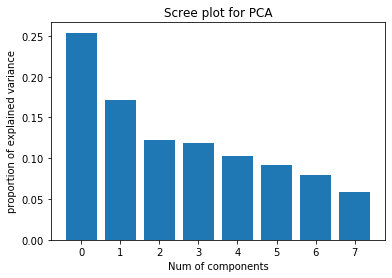

In [21]:
index = np.arange(8)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')
# The first two pcs are most important, but none truly dominate indicators of data variance.